In [27]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.metrics import r2_score

In [13]:
#import data
data =pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
#preprocessing
data = data.dropna()
data.drop_duplicates(inplace=True)
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [16]:
#encoding >>converting strings to numbers with LabelEncoder:

data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\Users\ascom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


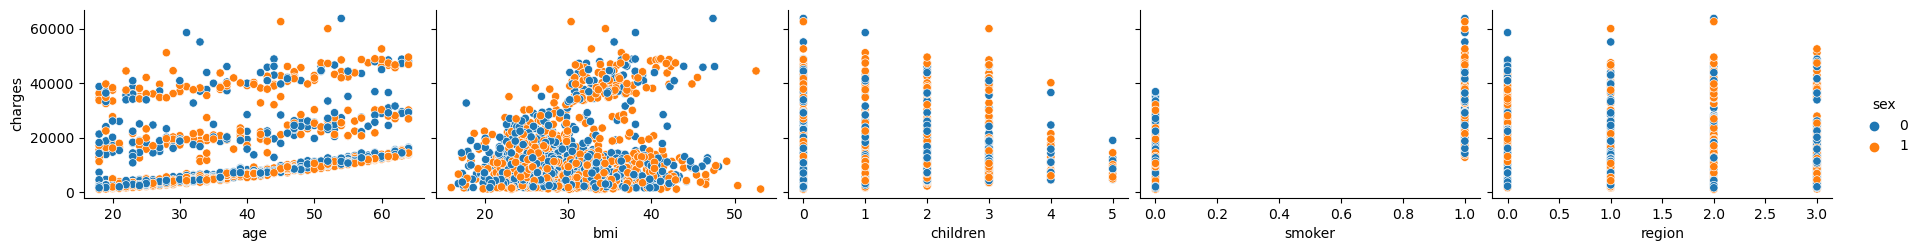

In [17]:
#Ploting the dataset and observing the correlation between the features:

sns.pairplot(data, x_vars=['age','bmi','children','smoker','region'], y_vars='charges', hue='sex', aspect=1.5)
plt.show()

In [21]:
#Their is no effect of ['sex','region']
columns = ['sex','region','charges']
x = data.drop(columns=columns, axis=1).values
y = data['charges'].values

In [22]:
# scaling the X array
scaler = StandardScaler()
x = scaler.fit_transform(X)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
print('Coefficient is: ', model.coef_)


Coefficient is:  [3498.41637665 1861.57758475  648.32131894 9301.22690067]


In [25]:
print('Intercept is: ', model.intercept_)

Intercept is:  13189.343636937858


In [28]:
predicted_y = model.predict(x_test)

print('Mean absolute error is %.2f' %np.mean(np.absolute(predicted_y - y_test)))
print('MSE is %.2f' %np.mean((predicted_y - y_test)**2))
print('R2 score is %.2f' %r2_score(y_test, predicted_y))

Mean absolute error is 4198.59
MSE is 35914551.48
R2 score is 0.80
